In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## EDA

In [2]:
product_emissions_df = pd.read_csv('product_emissions.csv', sep=';')
product_emissions_df.head()

,id,year,product_name,company,country,industry_group,weight_kg,carbon_footprint_pcf,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,"Food, Beverage & Tobacco",0.7485,2.00,57.50%,30.00%,12.50%
1,10056-1-2015,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage Processing,0.7485,2.00,57.50%,30.00%,12.50%
2,10222-1-2013,2013,Office Chair,KNOLL INC,USA,Capital Goods,20.6800,72.54,80.63%,17.36%,2.01%
3,10261-1-2017,2017,Multifunction Printers,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,110.0000,1488.00,30.65%,5.51%,63.84%
4,10261-2-2017,2017,Multifunction Printers,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,110.0000,1818.00,25.08%,4.51%,70.41%


In [3]:
product_emissions_df.shape

(866, 11)

In [4]:
product_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            866 non-null    object 
 1   year                          866 non-null    int64  
 2   product_name                  866 non-null    object 
 3   company                       866 non-null    object 
 4   country                       866 non-null    object 
 5   industry_group                866 non-null    object 
 6   weight_kg                     866 non-null    float64
 7   carbon_footprint_pcf          866 non-null    float64
 8   upstream_percent_total_pcf    866 non-null    object 
 9   operations_percent_total_pcf  866 non-null    object 
 10  downstream_percent_total_pcf  866 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.6+ KB


In [5]:
duplicates = product_emissions_df[product_emissions_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, year, product_name, company, country, industry_group, weight_kg, carbon_footprint_pcf, upstream_percent_total_pcf, operations_percent_total_pcf, downstream_percent_total_pcf]
Index: []


In [6]:
print(product_emissions_df.columns)

Index(['id', 'year', 'product_name', 'company', 'country', 'industry_group',
       'weight_kg', 'carbon_footprint_pcf', 'upstream_percent_total_pcf',
       'operations_percent_total_pcf', 'downstream_percent_total_pcf'],
      dtype='object')


## 2: Time range of the data 
- Return the years for which data was collected.

In [7]:
min_year = product_emissions_df['year'].min()
max_year = product_emissions_df['year'].max()

print("Min Year:", min_year)
print("Max Year:", max_year)

Min Year: 2013
Max Year: 2017


## 3: Targeting major emmiters
- Which countries had the highest emissions during the period 2013–2017? Grouping by country, select `country` and the sum of `total carbon_footprint_pcf` by country, aliasing as `total_country_footprint`.
- Let's take a look at emissions by country and look at country representation in the dataset by creating a bar chart using the `country` column of `product_emissions_df`.

In [8]:
country_footprint = (
    product_emissions_df
    .groupby("country")["carbon_footprint_pcf"]
    .sum()
    .reset_index()
    .rename(columns={"carbon_footprint_pcf": "total_country_footprint"})
    .sort_values(by="total_country_footprint", ascending=False)
)
country_footprint.columns = ["country", "total_country_footprint"]
country_footprint

,country,total_country_footprint
22,Spain,9.786126e+06
9,Germany,2.251225e+06
15,Japan,5.193443e+05
26,USA,4.518692e+05
2,Brazil,1.675877e+05
17,Luxembourg,1.670073e+05
21,South Korea,1.409941e+05
19,Netherlands,7.041534e+04
25,Taiwan,6.151307e+04
11,India,2.457400e+04


In [9]:
# Group by 'country', sum 'carbon_footprint_pcf', round to 1 decimal, and sort descending
emissions_by_country = (
    product_emissions_df
    .groupby('country')['carbon_footprint_pcf']
    .sum()
    .round(1)
    .to_frame()
    .rename(columns={"carbon_footprint_pcf": "total_country_footprint"})
    .sort_values(by='total_country_footprint', ascending=False)
    .reset_index()
)

print(emissions_by_country)

           country  total_country_footprint
0            Spain                9786126.2
1          Germany                2251224.9
2            Japan                 519344.3
3              USA                 451869.2
4           Brazil                 167587.7
5       Luxembourg                 167007.3
6      South Korea                 140994.1
7      Netherlands                  70415.3
8           Taiwan                  61513.1
9            India                  24574.0
10         Finland                  21581.0
11    South Africa                  12310.9
12  United Kingdom                   6735.1
13         Ireland                   5130.0
14          Sweden                   4533.0
15          France                   1613.8
16           Chile                   1555.6
17       Indonesia                    721.0
18          Canada                    382.2
19       Australia                    238.5
20        Malaysia                    233.7
21           China              

In [11]:
# Create a plotly bar chart of the country distribution for companies in dataset
fig = px.bar(emissions_by_country, x="country", y="total_country_footprint", title="Emissions by country")
fig.show()

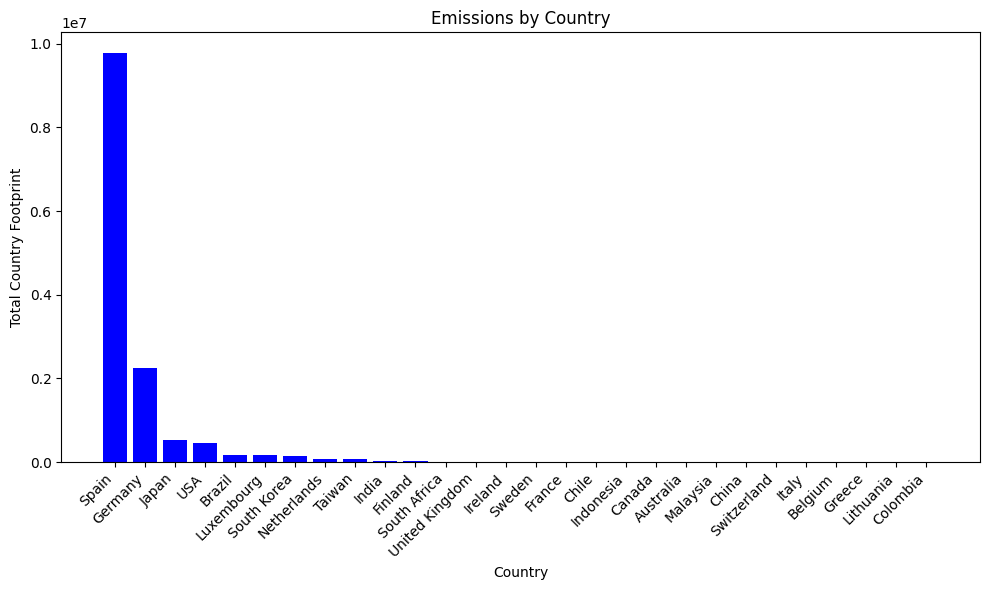

In [32]:
# Sort values (optional, for better visualization)
emissions_by_country_sorted = emissions_by_country.sort_values(by="total_country_footprint", ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emissions_by_country_sorted["country"], emissions_by_country_sorted["total_country_footprint"], color="blue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Country Footprint")
plt.title("Emissions by Country")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

Spain has a lot of emissions! Where do they come from?
- Return the `company`, `industry_group` and a rounded total of `carbon_footprint_pcf` for each industry group in Spain, aliasing as `total_carbon_footprint_pcf`.

In [16]:
# Filter for Spain first
spain_df = product_emissions_df[product_emissions_df['country'] == 'Spain']

# Group by company and industry_group, sum the carbon_footprint_pcf, round it, and sort
emissions_by_company = (
    spain_df
    .groupby(['company', 'industry_group'])['carbon_footprint_pcf']
    .sum()
    .round(1)
    .reset_index(name='total_carbon_footprint_pcf')
    .sort_values(by='total_carbon_footprint_pcf', ascending=False)
)

emissions_by_company

,company,industry_group,total_carbon_footprint_pcf
4,"Gamesa Corporación Tecnológica, S.A.",Electrical Equipment and Machinery,9778464.0
1,"Compañía Española de Petróleos, S.A.U. CEPSA",Energy,6999.0
0,Agraz,"Food, Beverage & Tobacco",340.2
2,Crimidesa,Chemicals,180.0
3,Crimidesa,Materials,140.0
5,Miquel Y Costas,Materials,3.0


Return all information for the `company` Gamesa Corporación Tecnológica, S.A. which produces the highest amount of `total_carbon_footprint_pcf`.
Gamesa Corporación Tecnológica is actually a renewable energy company specializing in wind power. Why might it have such high emissions? Discovering these twists in the data is very important. 

In [18]:
# Filter rows where 'company' starts with 'Gamesa Corp'
gamesa_df = product_emissions_df[product_emissions_df['company'].str.startswith('Gamesa Corp')]
gamesa_df

,id,year,product_name,company,country,industry_group,weight_kg,carbon_footprint_pcf,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf
471,22917-2-2015,2015,Wind Turbine G90 2 Megawats,"Gamesa Corporación Tecnológica, S.A.",Spain,Electrical Equipment and Machinery,361000.0,1251625.0,N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data)
472,22917-3-2015,2015,Wind Turbine G114 2 Megawats,"Gamesa Corporación Tecnológica, S.A.",Spain,Electrical Equipment and Machinery,400000.0,1532608.0,N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data)
473,22917-4-2015,2015,Wind Turbine G128 5 Megawats,"Gamesa Corporación Tecnológica, S.A.",Spain,Electrical Equipment and Machinery,600000.0,3718044.0,N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data)
474,22917-5-2015,2015,Wind Turbine G132 5 Megawats,"Gamesa Corporación Tecnológica, S.A.",Spain,Electrical Equipment and Machinery,600000.0,3276187.0,N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data)


- Limit to data for 2015 and order by `total_industry_footprint`.

In [19]:
# Filter the DataFrame for the year 2015
df_2015 = product_emissions_df[product_emissions_df['year'] ==2015]

# Group by country and industry_group, sum carbon_footprint_pcf, round to 1 decimal
industry_footprint_2015 = (
    df_2015
    .groupby(['country', 'industry_group'])['carbon_footprint_pcf']
    .sum()
    .round(1)
    .reset_index(name='total_industry_footprint')
    .sort_values(by='total_industry_footprint', ascending=False)
)

industry_footprint_2015

,country,industry_group,total_industry_footprint
30,Spain,Electrical Equipment and Machinery,9778464.0
11,Germany,Automobiles & Components,778127.0
37,Taiwan,Technology Hardware & Equipment,58605.2
38,USA,Automobiles & Components,39100.0
22,Japan,Technology Hardware & Equipment,24305.8
24,Netherlands,Chemicals,23250.0
46,USA,Software & Services,22851.2
3,Brazil,Electrical Equipment and Machinery,20007.6
26,South Korea,Chemicals,17430.0
47,USA,Technology Hardware & Equipment,10699.0


## 4: Industry representation
It looks like the Electrical Equipment and Machinery had a huge carbon footprint in 2015. But what if that's just because there are many companies from the Electrical Equipment and Machinery industry in the dataset? Let's check which industries are most heavily represented in that year.
- Return each `industry_group` included in the table and a count of the number of records that list that industry group.
- Limit the results to only those from 2017 and alias the count as `count_company`.
- Order by `count_industry`, descending.

In [23]:
# Filter for records from the year 2015 and country Spain
df_2015 = product_emissions_df[
    (product_emissions_df['year'] == 2015) & 
    (product_emissions_df['country'] == 'Spain')
]

# Group by industry_group and count unique companies
industry_count_2015 = (
    df_2015
    .groupby('industry_group')['company']
    .nunique()
    .reset_index(name='count_company')
    .sort_values(by='count_company', ascending=False)
)

industry_count_2015


,industry_group,count_company
0,Chemicals,1
1,Electrical Equipment and Machinery,1


Since Gamesa Corporación Tecnológica belongs to the `Electrical Equipment and Machinery` industry group, it is worthwhile to examine and compare the carbon footprints of other companies within the same group.

In [25]:
# Filter for year 2015 and industry group 'Electrical Equipment and Machinery'
electrical_2015 = product_emissions_df[
    (product_emissions_df['year'] == 2015) &
    (product_emissions_df['industry_group'] == 'Electrical Equipment and Machinery')
]

# Sort the filtered DataFrame
electrical_2015 = electrical_2015.sort_values(by='carbon_footprint_pcf', ascending=False)

# Select the relevant columns
electrical_2015 = electrical_2015[
    ['country', 'industry_group', 'company', 'product_name', 'weight_kg', 'carbon_footprint_pcf']
]

electrical_2015

,country,industry_group,company,product_name,weight_kg,carbon_footprint_pcf
473,Spain,Electrical Equipment and Machinery,"Gamesa Corporación Tecnológica, S.A.",Wind Turbine G128 5 Megawats,600000.000,3718044.000
474,Spain,Electrical Equipment and Machinery,"Gamesa Corporación Tecnológica, S.A.",Wind Turbine G132 5 Megawats,600000.000,3276187.000
472,Spain,Electrical Equipment and Machinery,"Gamesa Corporación Tecnológica, S.A.",Wind Turbine G114 2 Megawats,400000.000,1532608.000
471,Spain,Electrical Equipment and Machinery,"Gamesa Corporación Tecnológica, S.A.",Wind Turbine G90 2 Megawats,361000.000,1251625.000
350,Brazil,Electrical Equipment and Machinery,Weg S/A,Electric Motor,90.000,20007.620
542,Japan,Electrical Equipment and Machinery,Sanden,Vending Machine,342.462,2268.100
610,USA,Electrical Equipment and Machinery,Tennant Company,T300,181.000,655.000
225,USA,Electrical Equipment and Machinery,"Stanley Black & Decker, Inc.",DC988 Type 11 Cordless Power Drill equipment w...,2.700,88.130
223,USA,Electrical Equipment and Machinery,"Stanley Black & Decker, Inc.",D21710 Type 5 Corded Power Drill,1.820,55.670
204,France,Electrical Equipment and Machinery,Schneider Electric,ACTI9 IID K 2P 40A 30MA AC-TYPE RESIDUAL CURRE...,0.210,19.100


In [26]:
result = product_emissions_df[
    (product_emissions_df['year'] == 2015) &
    (product_emissions_df['industry_group'] == 'Electrical Equipment and Machinery')
][[
    'product_name',
    'company',
    'upstream_percent_total_pcf',
    'operations_percent_total_pcf',
    'downstream_percent_total_pcf',
    'weight_kg',
    'carbon_footprint_pcf'
]]

result


,product_name,company,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf,weight_kg,carbon_footprint_pcf
204,ACTI9 IID K 2P 40A 30MA AC-TYPE RESIDUAL CURRE...,Schneider Electric,6.68%,1.44%,91.88%,0.210,19.100
223,D21710 Type 5 Corded Power Drill,"Stanley Black & Decker, Inc.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),1.820,55.670
225,DC988 Type 11 Cordless Power Drill equipment w...,"Stanley Black & Decker, Inc.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),2.700,88.130
350,Electric Motor,Weg S/A,0.10%,0.02%,99.88%,90.000,20007.620
471,Wind Turbine G90 2 Megawats,"Gamesa Corporación Tecnológica, S.A.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),361000.000,1251625.000
472,Wind Turbine G114 2 Megawats,"Gamesa Corporación Tecnológica, S.A.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),400000.000,1532608.000
473,Wind Turbine G128 5 Megawats,"Gamesa Corporación Tecnológica, S.A.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),600000.000,3718044.000
474,Wind Turbine G132 5 Megawats,"Gamesa Corporación Tecnológica, S.A.",N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),600000.000,3276187.000
542,Vending Machine,Sanden,42.63%,6.67%,50.70%,342.462,2268.100
610,T300,Tennant Company,N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),N/a (product with insufficient stage-level data),181.000,655.000


## Carbon emissions normalized by product weight. 
Create additional column `carbon footprint per weight` and check the total carbon footprint and carbon footprint per weight

In [27]:
# Create a new column for carbon footprint per weight
product_emissions_df['carbon_footprint_per_weight'] = (
    product_emissions_df['carbon_footprint_pcf'] / product_emissions_df['weight_kg']
)

# Group by country, sum total carbon footprint and sum of carbon footprint per weight
country_emissions = (
    product_emissions_df
    .groupby('country')
    .agg(
        total_country_footprint=('carbon_footprint_pcf', 'sum'),
        total_country_footprint_per_weight=('carbon_footprint_per_weight', 'sum')
    )
    .round(1)
    .reset_index()
    .sort_values(by='total_country_footprint', ascending=False)
)

country_emissions


,country,total_country_footprint,total_country_footprint_per_weight
22,Spain,9786126.2,31.8
9,Germany,2251224.9,1391.2
15,Japan,519344.3,4938.3
26,USA,451869.2,13751.4
2,Brazil,167587.7,1804.8
17,Luxembourg,167007.3,2.7
21,South Korea,140994.1,490.9
19,Netherlands,70415.3,94.7
25,Taiwan,61513.1,1745.9
11,India,24574.0,24.6


Order by `total_country_footprint_per_weight` and check the values for all years

In [28]:
# Create a new column for carbon footprint per weight
product_emissions_df['carbon_footprint_per_weight'] = (
    product_emissions_df['carbon_footprint_pcf'] / product_emissions_df['weight_kg']
)

# Group by country, sum total carbon footprint and sum of carbon footprint per weight
country_emissions = (
    product_emissions_df
    .groupby('country')
    .agg(
        total_country_footprint=('carbon_footprint_pcf', 'sum'),
        total_country_footprint_per_weight=('carbon_footprint_per_weight', 'sum')
    )
    .round(1)
    .reset_index()
    .sort_values(by='total_country_footprint_per_weight', ascending=False)
)

country_emissions


,country,total_country_footprint,total_country_footprint_per_weight
26,USA,451869.2,13751.4
15,Japan,519344.3,4938.3
3,Canada,382.2,2220.9
2,Brazil,167587.7,1804.8
25,Taiwan,61513.1,1745.9
9,Germany,2251224.9,1391.2
8,France,1613.8,1217.3
27,United Kingdom,6735.1,568.4
21,South Korea,140994.1,490.9
7,Finland,21581.0,338.4


Order by `total_country_footprint_per_weight` and check the values for 2015 year

In [29]:
# Create the calculated column: carbon_footprint_per_weight
product_emissions_df['carbon_footprint_per_weight'] = (
    product_emissions_df['carbon_footprint_pcf'] / product_emissions_df['weight_kg']
)

# Filter for year 2015
df_2015 = product_emissions_df[product_emissions_df['year'] == 2015]

# Group by country and year, then aggregate and round
emissions_2015 = (
    df_2015
    .groupby(['country', 'year'])
    .agg(
        total_country_footprint=('carbon_footprint_pcf', 'sum'),
        total_country_footprint_per_weight=('carbon_footprint_per_weight', 'sum')
    )
    .round(1)
    .reset_index()
    .sort_values(by='total_country_footprint_per_weight', ascending=False)
)

emissions_2015


,country,year,total_country_footprint,total_country_footprint_per_weight
20,USA,2015,76200.4,2964.2
12,Japan,2015,32291.2,1291.6
7,Germany,2015,778127.0,502.1
6,France,2015,186.0,365.5
3,Canada,2015,65.1,317.6
15,South Korea,2015,17511.2,302.5
19,Taiwan,2015,58605.2,268.4
2,Brazil,2015,20012.0,226.7
21,United Kingdom,2015,702.7,135.0
17,Sweden,2015,1237.1,71.9


In [28]:
# Create a plotly bar chart of the country distribution for total_country_footprint_per_weight
fig = px.bar(emissions_2015, x="country", y="total_country_footprint_per_weight", title="Carbon Emissions Normalized by Product Weight")
fig.show()

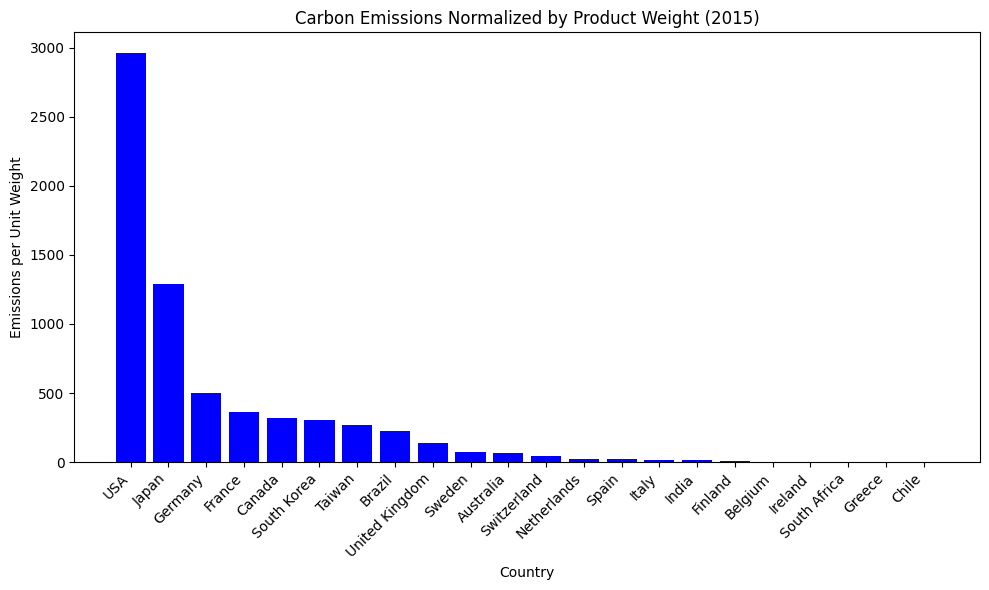

In [33]:
# Sort values for better readability (optional)
emissions_2015_sorted = emissions_2015.sort_values(by="total_country_footprint_per_weight", ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emissions_2015_sorted["country"], emissions_2015_sorted["total_country_footprint_per_weight"], color="blue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Emissions per Unit Weight")
plt.title("Carbon Emissions Normalized by Product Weight (2015)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Count number of companies per country
country_counts = product_emissions_df["country"].value_counts().reset_index()
country_counts.columns = ["country", "count"]

In [141]:
# Create a plotly bar chart of the country distribution for companies in dataset
fig = px.bar(country_counts, x="country", y="count", title="Company Count by Country")
fig.show()

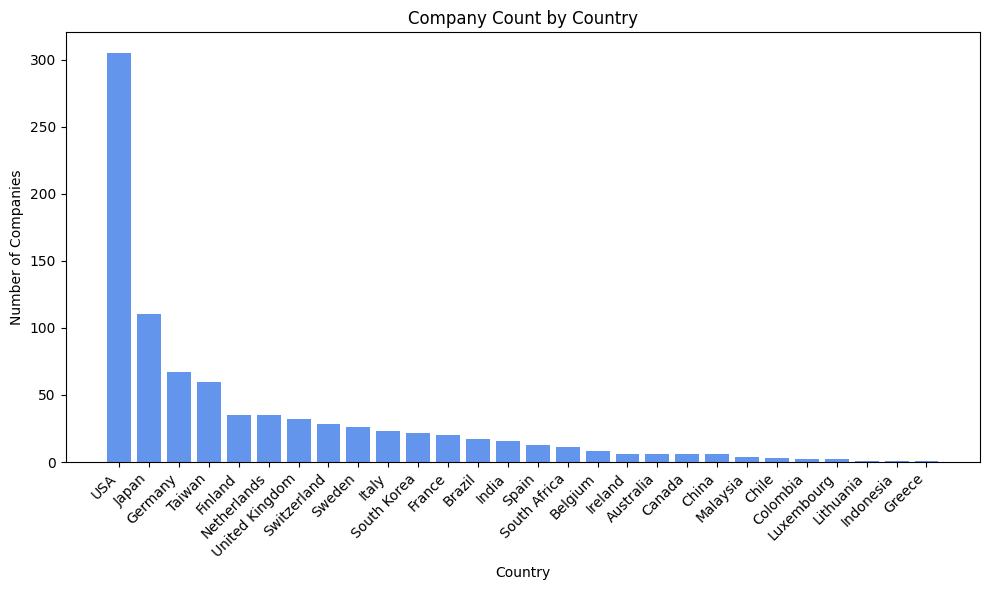

In [35]:
# Sort values for clearer visualization (optional)
country_counts_sorted = country_counts.sort_values(by="count", ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_counts_sorted["country"], country_counts_sorted["count"], color="cornflowerblue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Number of Companies")
plt.title("Company Count by Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()